Actividad 1

In [5]:

import pandas as pd
path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTWsahNju_LTtJBjuaaILBx_3QutbzK-HCjGoLtrtcIBEu4rOQgdiz17AD8SDa13g/pub?output=csv"



def problema1(path):
    dic = {}
    df = pd.read_csv(path)
    df = df.set_index("Date").drop("Unnamed: 1", axis=1)
    dic["cantidad_columnas"] = len(df.columns)
    dic["nombre_columnas"] = list(df.columns)
    nonan = {}
    for i in list(df.columns):
        nonan[i] = df[i].count()
    dic["Datos_No_NaN"] = nonan
    dic["Memoria_Usada"] = df.memory_usage().rename(index = {"Index":"Date"})
    dic["informacion"] = df.describe().drop(["count","min","25%","50%","75%"],axis=0)
    df = df.fillna("None")
    for i in dic:
        print(i,"\n",dic[i])
    
problema1(path)


cantidad_columnas 
 4
nombre_columnas 
 ['Berri1', 'Maisonneuve_1', 'Maisonneuve_2', 'Brebeuf']
Datos_No_NaN 
 {'Berri1': 365, 'Maisonneuve_1': 365, 'Maisonneuve_2': 365, 'Brebeuf': 178}
Memoria_Usada 
 Date             2920
Berri1           2920
Maisonneuve_1    2920
Maisonneuve_2    2920
Brebeuf          2920
dtype: int64
informacion 
            Berri1  Maisonneuve_1  Maisonneuve_2      Brebeuf
mean  2032.200000    1060.252055    2093.169863  2576.359551
std   1878.879799    1079.533086    1854.368523  2484.004743
max   6626.000000    4242.000000    6587.000000  7575.000000


Actividad 2

Primary Type
STALKING                               1
CONCEALED CARRY LICENSE VIOLATION      1
LIQUOR LAW VIOLATION                   2
PROSTITUTION                           2
SEX OFFENSE                            3
ARSON                                  3
OFFENSE INVOLVING CHILDREN             4
PUBLIC PEACE VIOLATION                 4
CRIM SEXUAL ASSAULT                    4
CRIMINAL SEXUAL ASSAULT                5
INTERFERENCE WITH PUBLIC OFFICER       6
CRIMINAL TRESPASS                     20
WEAPONS VIOLATION                     23
ROBBERY                               26
BURGLARY                              28
MOTOR VEHICLE THEFT                   29
NARCOTICS                             37
ASSAULT                               63
OTHER OFFENSE                         65
DECEPTIVE PRACTICE                    84
CRIMINAL DAMAGE                      112
BATTERY                              182
THEFT                                296
Name: Date, dtype: int64
                   

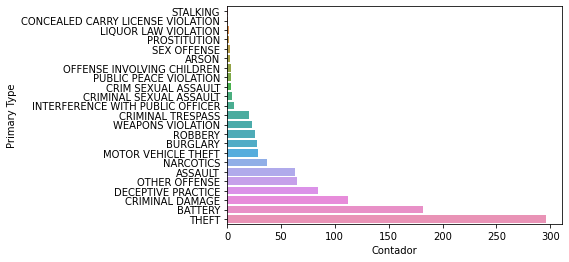

In [6]:
import pandas as pd
import seaborn as sns
path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQqCpt9ad3JYNclQrdwHtqJVnMlMyNHI-p176ceLZSIZxK9aacD5xaCE3M5oItoTQOjsgm7aEXXW-V0/pub?output=csv"
def problema2(path):
    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date, format="%m/%d/%Y %I:%M:%S %p")
    df = df.drop("Unnamed: 0", axis=1)
    datos_info = df.groupby("Primary Type").Date.count().sort_values(ascending=True)
    print(datos_info)
    print(df[100:121])
    datos_info = datos_info.reset_index().rename(columns = {"Date":"Contador"})

    ax = sns.barplot(x = "Contador", y="Primary Type", data = datos_info)

problema2(path)


Actividad 3

Los vacunados en Colombia entre 1.5e+06 y 2e+06 fueron 334252.0



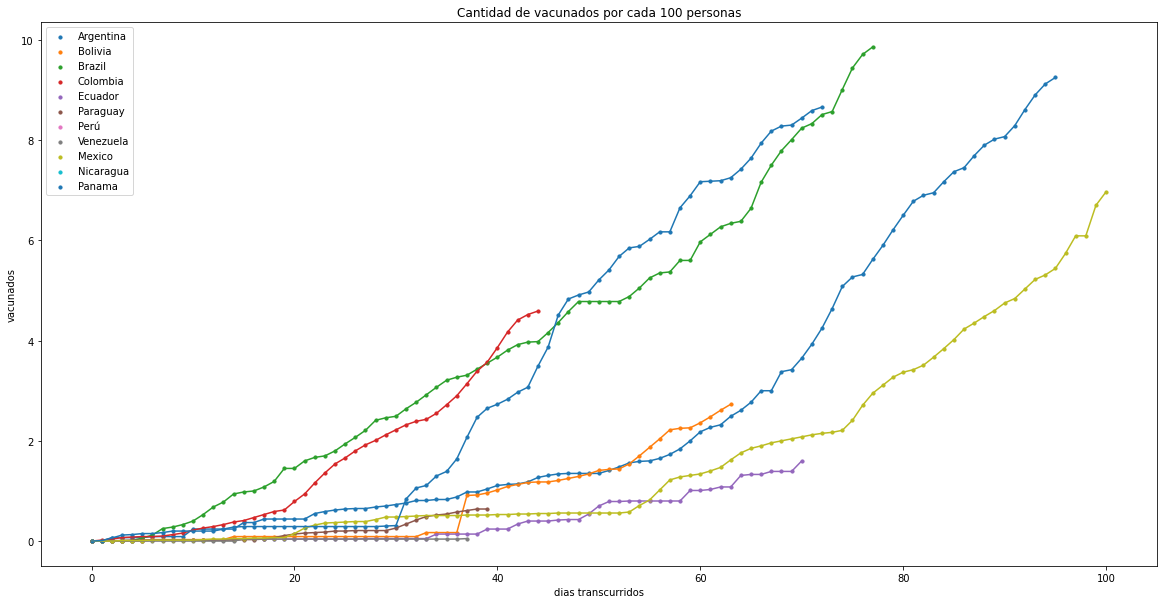

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSJ7bFjFQu-VmuwebbH0vrg8a3b168p6aTsglLbMISvmgYmg9yGT6mPdlAUVeBl1lU1Cxnj9wtNxghu/pub?output=csv"


def Problema3(path):
    fig, ax = plt.subplots(figsize = (20,10))  # Creacion del grafico
    df = pd.read_csv(path)

    countries = ["Argentina", "Bolivia", "Brazil", "Colombia", "Ecuador",
                 "Paraguay", "Perú", "Venezuela","Mexico","Nicaragua","Panama"]   # Lista de paises
    for country in countries:  # Ciclo para la creacion de cada grafica
        tf = df[df["country"] == country]  # Filtro de solo los valores de un pais
        tf = tf.reset_index().drop("index", axis=1)  
        for i in range(len(tf.index)):  # Ciclo usado para eliminar los nan y remplazarlos con el valor anterior
            if np.isnan(tf.total_vaccinations_per_hundred[i]):  # con el fin de eliminar los saltos en la grafica
                tf.at[i,"total_vaccinations_per_hundred"] =  tf.at[i-1, "total_vaccinations_per_hundred"]
        labels = country  
        plt.scatter(list(tf.index),   
                    tf.total_vaccinations_per_hundred, label=labels, s=10)  # Creacion del scatter y union de puntos con plot
        plt.plot(list(tf.index), tf.total_vaccinations_per_hundred)
    ax.legend()  # Aplicar labels
    ax.title.set_text("Cantidad de vacunados por cada 100 personas")
    ax.set_xlabel("dias transcurridos")
    ax.set_ylabel("vacunados")

    df = df[df["country"] == "Colombia"]
    df = df[(df.total_vaccinations < 2e+06) &
            (df.total_vaccinations > 1.5e+06)]  # Seleccion establecida por el ejercicio
    string = "Los vacunados en Colombia entre 1.5e+06 y 2e+06 fueron {}\n"
    return string.format(df.daily_vaccinations.sum())


print(Problema3(path))